In [ ]:
!git clone https://github.com/khaled6001/tps.git

fatal: destination path 'tps' already exists and is not an empty directory.


**Dataset Name :** Algerian forest fires dataset

**Data Source :** https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset

**Brief Description :** This dataset is destribiotion of causses fire in two wilaya Bijaia and sidi belabbas

# First thing we have to do is loding library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Than read the file using pandas and check infomation

In [ ]:
data = pd.read_csv(r"tps/dav/Algerian_forest_fires_dataset_UPDATE.csv", header = 1)
df = pd.DataFrame(data)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB
None


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
df[165:167]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire


# Check if there is null cell or not

In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


# delete any null

# Add column "wilaya" and fill it

In [ ]:
df = df.dropna()
df.loc[:122, "wilaya"] = "bejaia"
df.loc[122:, "wilaya"] = "Sidi-Bel Abbes"
df

<ipython-input-298-82354f9fbca3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:122, "wilaya"] = "bejaia"


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,wilaya
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


# Check if there is rows adding (we now the row 122 was sidi belabbas)

# Then delete it

In [ ]:
print(df[120:125])
df = df.drop(123).reset_index(drop = True)
df[120:125]

     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC   DC  ISI  BUI  \
120   29     09  2012           26   80   16    1.8  47.4  2.9  7.7  0.3    3   
121   30     09  2012           25   78   14    1.4    45  1.9  7.5  0.2  2.4   
123  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC   DC  ISI  BUI   
124   01     06  2012           32   71   12    0.7  57.1  2.5  8.2  0.6  2.8   
125   02     06  2012           30   73   13      4  55.7  2.7  7.8  0.6  2.9   

     FWI    Classes            wilaya  
120  0.1  not fire             bejaia  
121  0.1  not fire             bejaia  
123  FWI    Classes    Sidi-Bel Abbes  
124  0.2  not fire     Sidi-Bel Abbes  
125  0.2  not fire     Sidi-Bel Abbes  


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,wilaya
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,bejaia
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbes


# Check columns and correct them if found any problem

In [ ]:
print(df.columns)
# df = df.rename(columns = {'Classes  ' : "Classes"})
df.columns=df.columns.str.strip()
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'wilaya'],
      dtype='object')
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'wilaya'],
      dtype='object')


# Rest type of column

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df [['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  wilaya       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.6+ KB


# Then we can show describtion

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


# Her delete Outliers

In [ ]:
dfm = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
dfe = dfm[dfm.apply(lambda x: (x >= x.mean() - 2 * x.std()) & (x <= x.mean() + 2 * x.std()), axis=0)]
df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = dfe
df = df.dropna()
df = df.reset_index(drop=True)
df.describe()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,180.000000,180.000,180.0,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000,180.000000,180.000000,180.00000
mean,14.655556,7.350,2012.0,32.255556,62.838889,15.283333,0.408333,79.52500,12.201111,40.639444,4.159444,13.912222,5.60000
std,8.330011,1.126,0.0,2.939088,12.496330,2.314093,0.883295,10.26973,7.799119,32.252110,2.905412,9.168081,5.13582
min,1.000000,6.000,2012.0,25.000000,33.000000,10.000000,0.000000,49.40000,1.900000,7.300000,0.400000,2.400000,0.10000
25%,8.000000,6.000,2012.0,30.000000,54.000000,14.000000,0.000000,74.12500,6.225000,15.700000,1.600000,6.575000,0.80000
50%,14.000000,7.000,2012.0,32.000000,63.000000,15.000000,0.000000,82.95000,10.850000,31.900000,3.400000,11.500000,3.95000
75%,21.000000,8.000,2012.0,35.000000,73.000000,17.000000,0.300000,87.40000,16.600000,55.575000,6.050000,19.050000,9.52500
max,31.000000,9.000,2012.0,39.000000,90.000000,21.000000,4.700000,92.50000,36.900000,141.100000,11.700000,41.300000,18.40000


# Check value of the column "classes" then edit it

In [ ]:
print(df["Classes"].value_counts())
df['Classes'] = df['Classes'].str.replace("( )+", '')
print(df["Classes"].value_counts())

fire             101
not fire          77
fire               1
not fire           1
Name: Classes, dtype: int64
fire       102
notfire     78
Name: Classes, dtype: int64


<ipython-input-304-beb595eb4951>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Classes'] = df['Classes'].str.replace("( )+", '')


# Transform the value of column "classes" and "wilay" to int for correlation


In [ ]:
class_mapping  = {'fire': 1, 'notfire': 0}
df['Classes'] = df['Classes'].replace(class_mapping).astype(int)
wilaya_mapping  = {'Sidi-Bel Abbes': 1, "bejaia": 0}
df['wilaya'] = df['wilaya'].replace(wilaya_mapping).astype(int)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,wilaya
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
3,6,6,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
4,7,6,2012,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,20,9,2012,34.0,58.0,13.0,0.2,79.5,18.7,88.0,2.1,24.4,3.8,0,1
176,22,9,2012,33.0,64.0,13.0,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1,1
177,23,9,2012,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1,1
178,25,9,2012,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,1


In [ ]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,wilaya
day,1.000000,-0.117514,NaN,0.159466,-0.093275,-0.018094,-0.176366,0.312197,0.530282,0.492240,0.302062,0.540016,0.408364,0.241765,-0.012626
month,-0.117514,1.000000,NaN,0.030217,-0.005102,-0.130463,-0.108548,0.133207,0.016559,0.104332,0.051665,0.044338,0.046950,0.052918,-0.030272
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.159466,0.030217,NaN,1.000000,-0.604262,-0.261232,-0.127789,0.547866,0.489740,0.338636,0.516880,0.453266,0.524401,0.420513,0.204534
RH,-0.093275,-0.005102,NaN,-0.604262,1.000000,0.247131,-0.008988,-0.490335,-0.289198,-0.083273,-0.499369,-0.226987,-0.416260,-0.279405,-0.305531
Ws,-0.018094,-0.130463,NaN,-0.261232,0.247131,1.000000,-0.009908,-0.162525,-0.037813,0.084515,0.021328,0.003865,0.033374,-0.072388,-0.157040
Rain,-0.176366,-0.108548,NaN,-0.127789,-0.008988,-0.009908,1.000000,-0.550091,-0.336831,-0.386547,-0.435090,-0.363964,-0.409927,-0.453750,0.191159
FFMC,0.312197,0.133207,NaN,0.547866,-0.490335,-0.162525,-0.550091,1.000000,0.657301,0.534214,0.818412,0.640230,0.767588,0.796573,0.145199
DMC,0.530282,0.016559,NaN,0.489740,-0.289198,-0.037813,-0.336831,0.657301,1.000000,0.821173,0.709207,0.975154,0.854459,0.616369,0.187445
DC,0.492240,0.104332,NaN,0.338636,-0.083273,0.084515,-0.386547,0.534214,0.821173,1.000000,0.561844,0.923965,0.737051,0.528232,-0.192101


In [ ]:
del df["year"]

In [ ]:
df1 = df[df["wilaya"]==0]
df2 = df[df["wilaya"]==1]

In this sujet we focus on 'Temperature', 'Ws', 'Rain' to know cause of fires in 'Sidi-Bel Abbes' and "bejaia"

Text(0.5, 1.0, 'Bijaia destrubiotion')

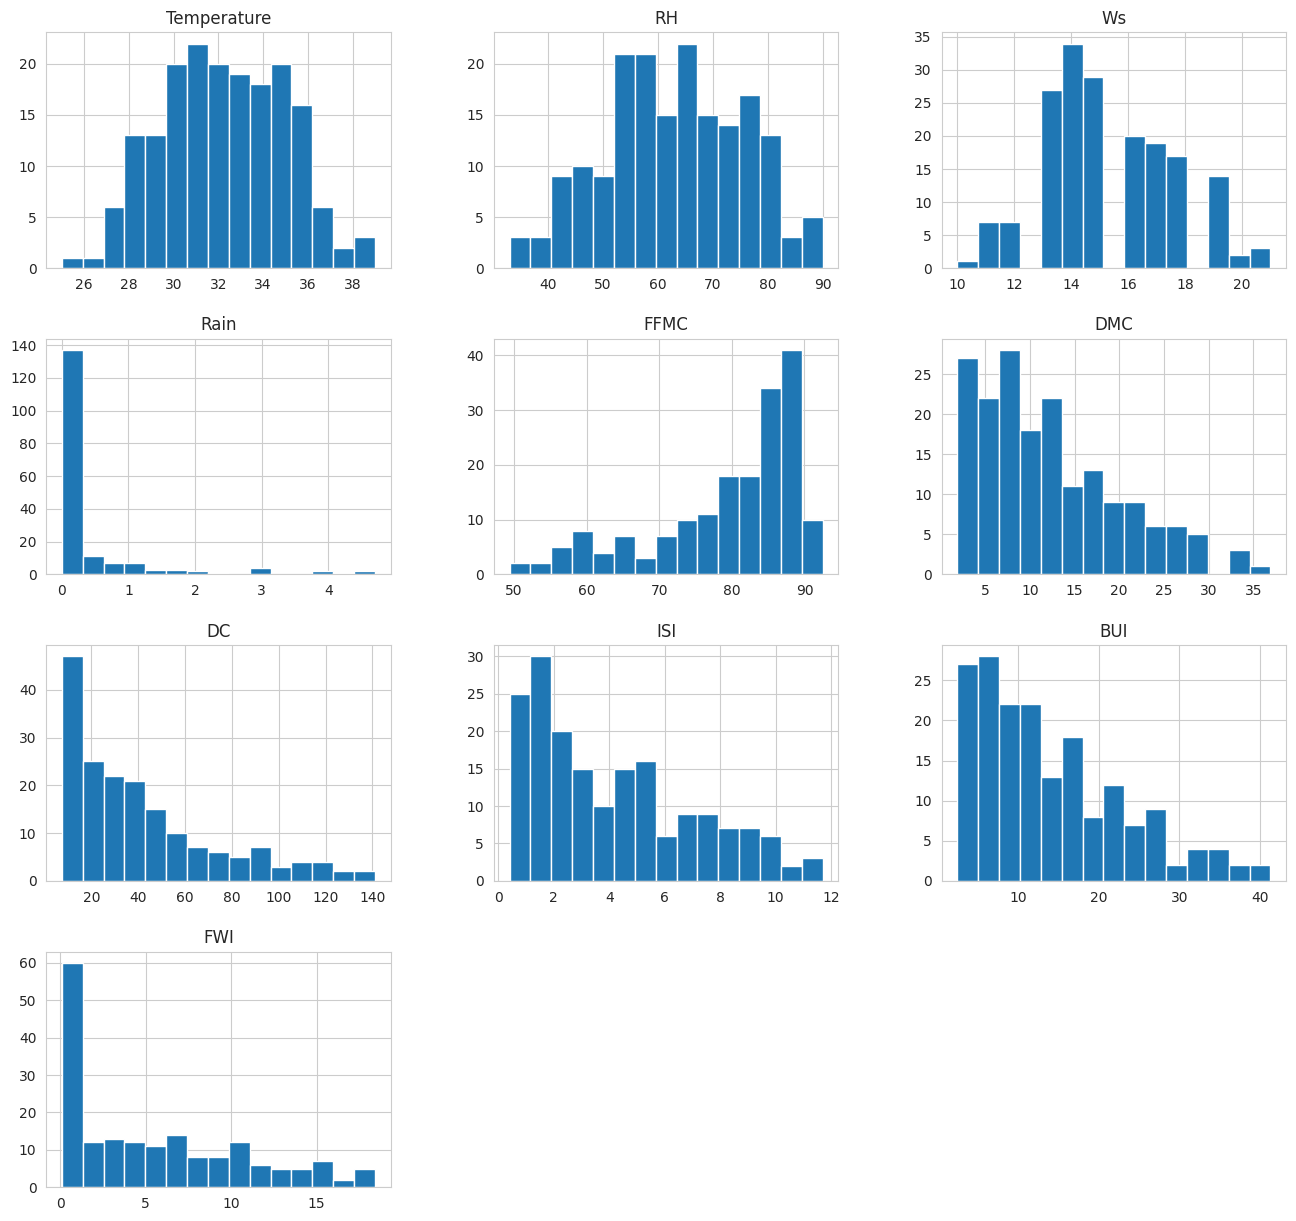

In [ ]:
dfplotB = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
dfplotB.hist(bins=15,figsize=(16,15));plt.title("Bijaia destrubiotion")

Text(0.5, 1.0, 'sidi Belabbas destrubiotion')

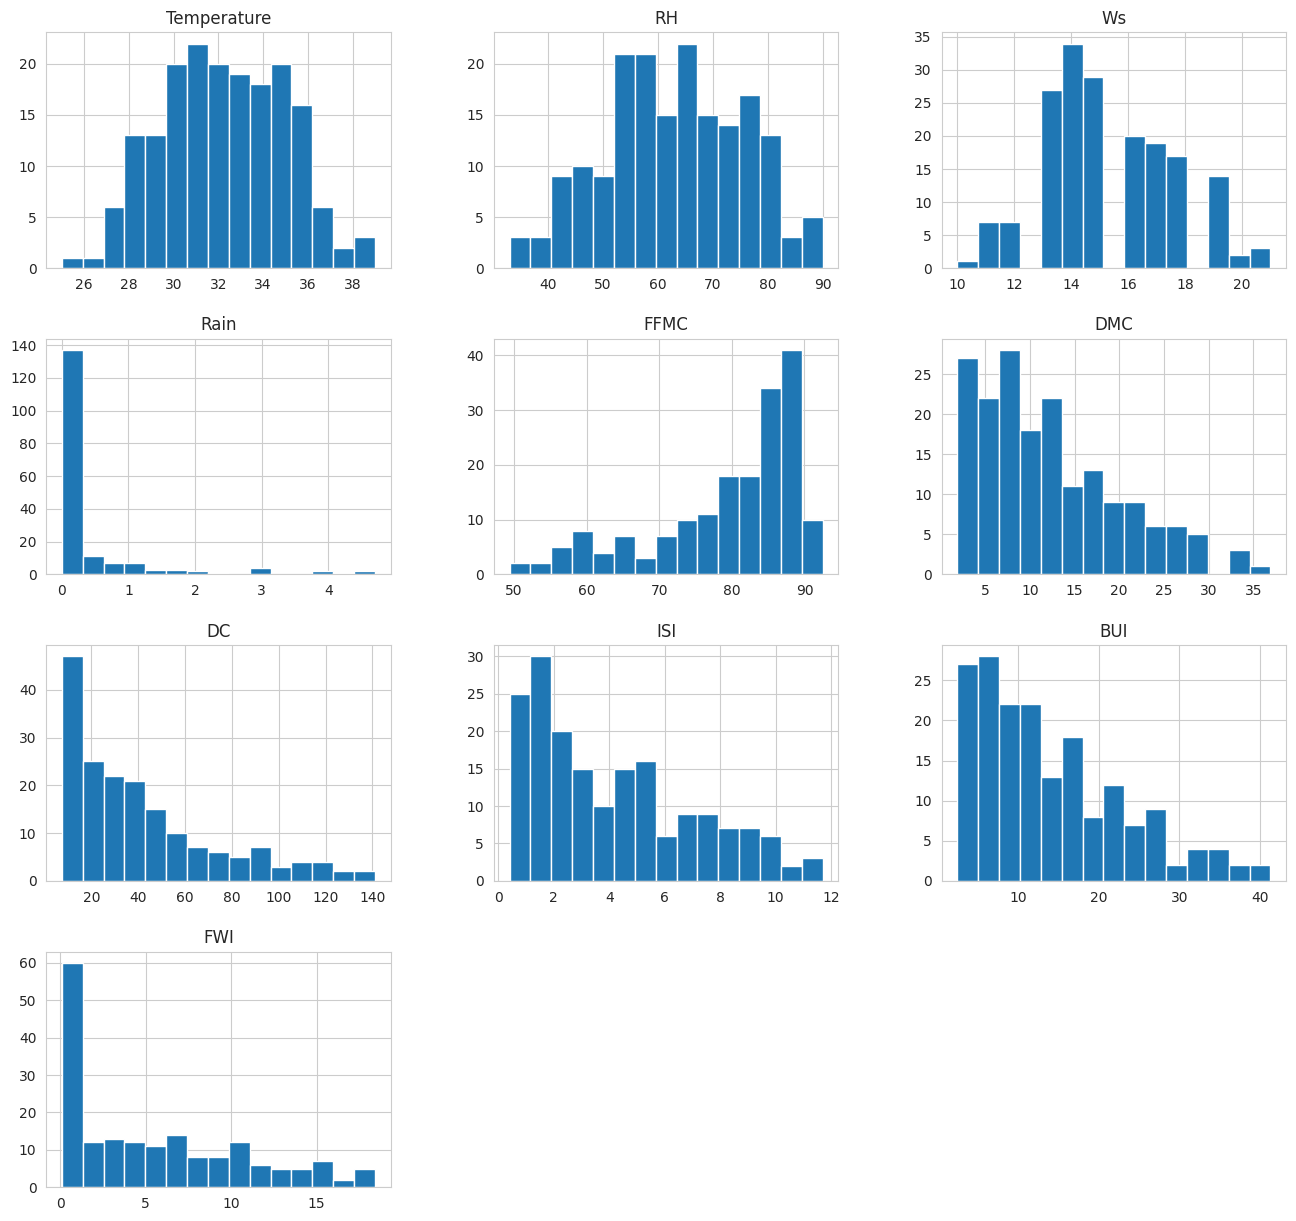

In [ ]:
dfplotS = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
dfplotS.hist(bins=15,figsize=(16,15));plt.title("sidi Belabbas destrubiotion")

for heatmap we use just correlation because we can't use all value

<ipython-input-311-dd5edf50deba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Classes'] = df1['Classes'].replace(class_mapping).astype(str)
<ipython-input-311-dd5edf50deba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Classes'] = df2['Classes'].replace(class_mapping).astype(str)
<ipython-input-311-dd5edf50deba>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.

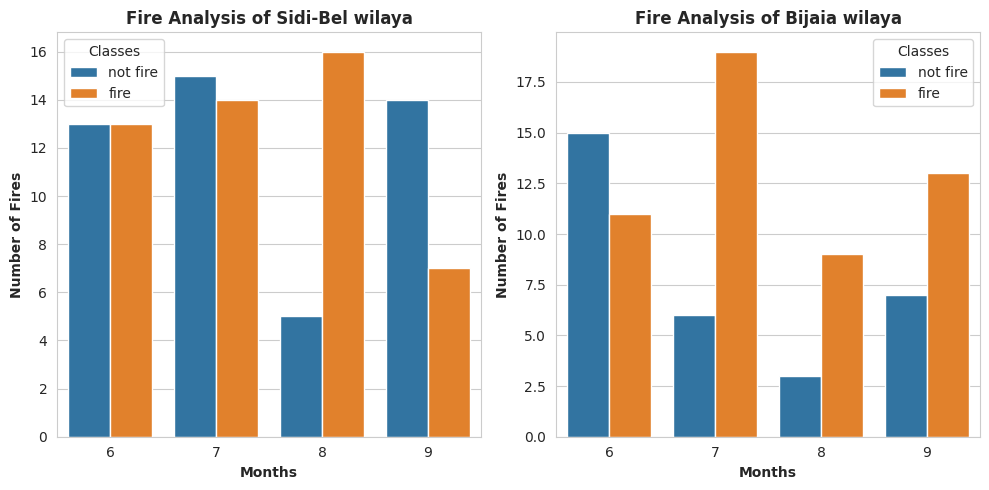

In [ ]:
class_mapping  = {1: 'fire', 0: 'not fire'}
df1['Classes'] = df1['Classes'].replace(class_mapping).astype(str)
df2['Classes'] = df2['Classes'].replace(class_mapping).astype(str)
plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
sns.countplot(x='month', hue='Classes', data=df1)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Sidi-Bel wilaya", weight='bold')
plt.subplot(1, 2, 2)
sns.countplot(x='month', hue='Classes', data=df2)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Bijaia wilaya", weight='bold')
plt.tight_layout()
plt.show()

<Axes: >

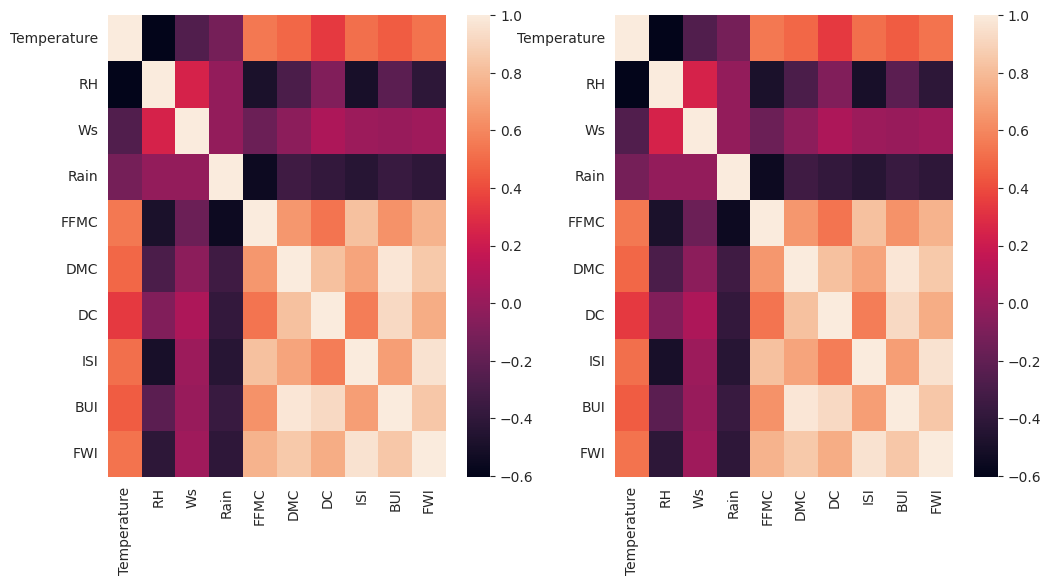

In [ ]:
fig = plt.figure(figsize = (12,6))
plt.subplot(121);sns.heatmap(dfplotB.corr())
plt.subplot(122);sns.heatmap(dfplotS.corr())

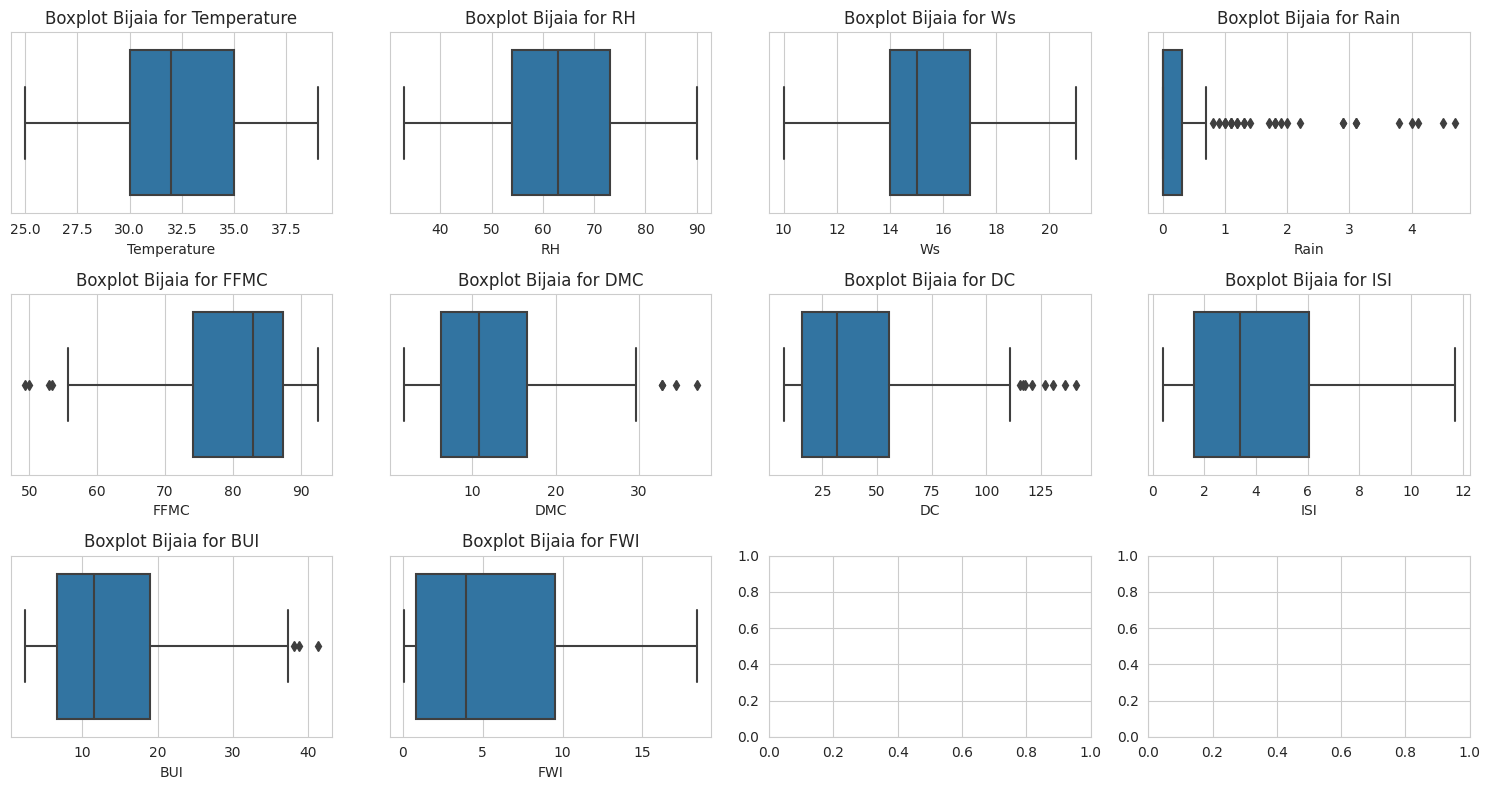

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))
axes = axes.flatten()
for i, column in enumerate(dfplotB.columns):
    sns.boxplot(x=dfplotB[column], ax=axes[i])
    axes[i].set_title(f'Boxplot Bijaia for {column}')
plt.tight_layout()
plt.show()

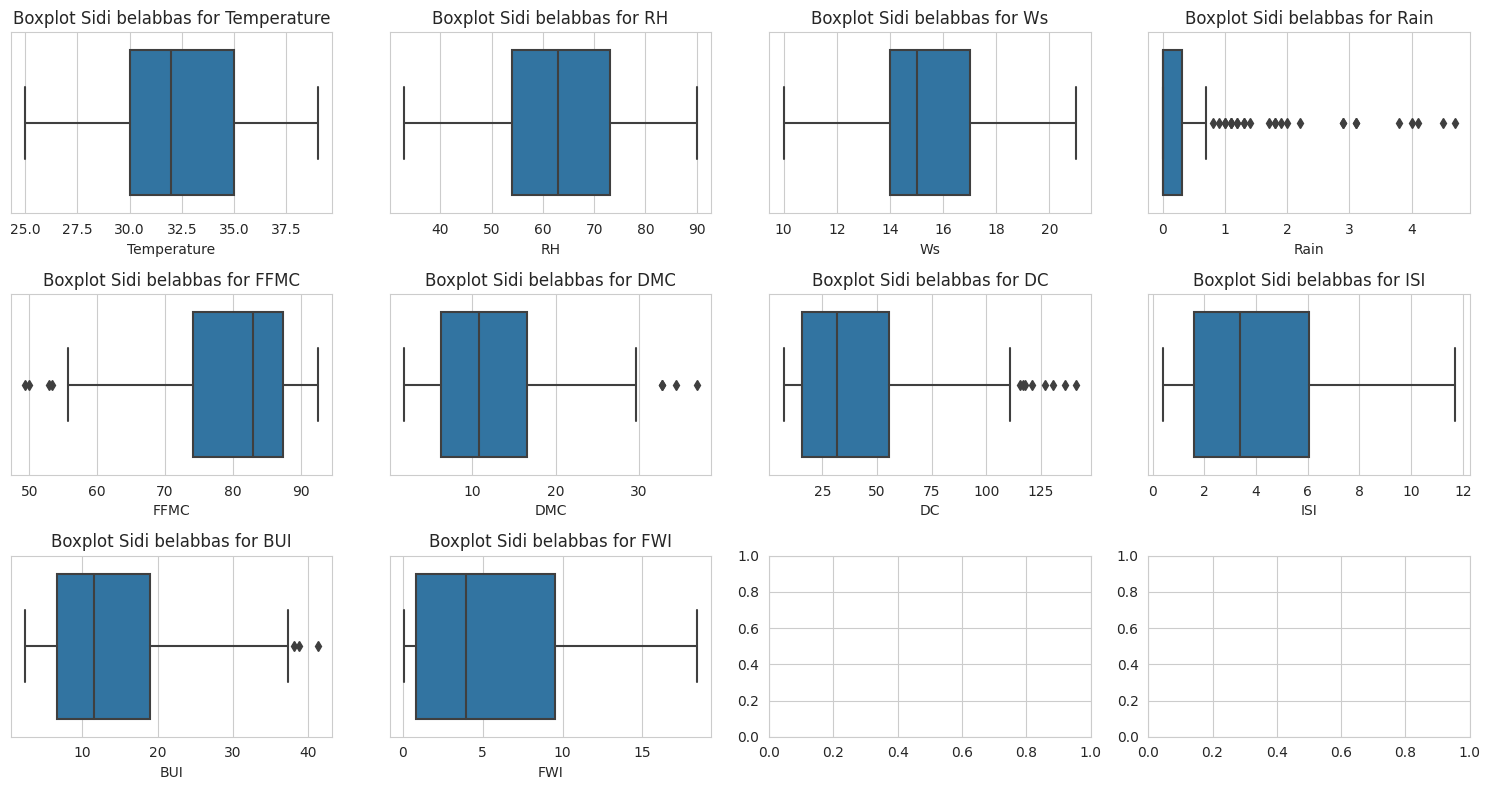

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))
axes = axes.flatten()
for i, column in enumerate(dfplotS.columns):
    sns.boxplot(x=dfplotS[column], ax=axes[i])
    axes[i].set_title(f'Boxplot Sidi belabbas for {column}')
plt.tight_layout()
plt.show()

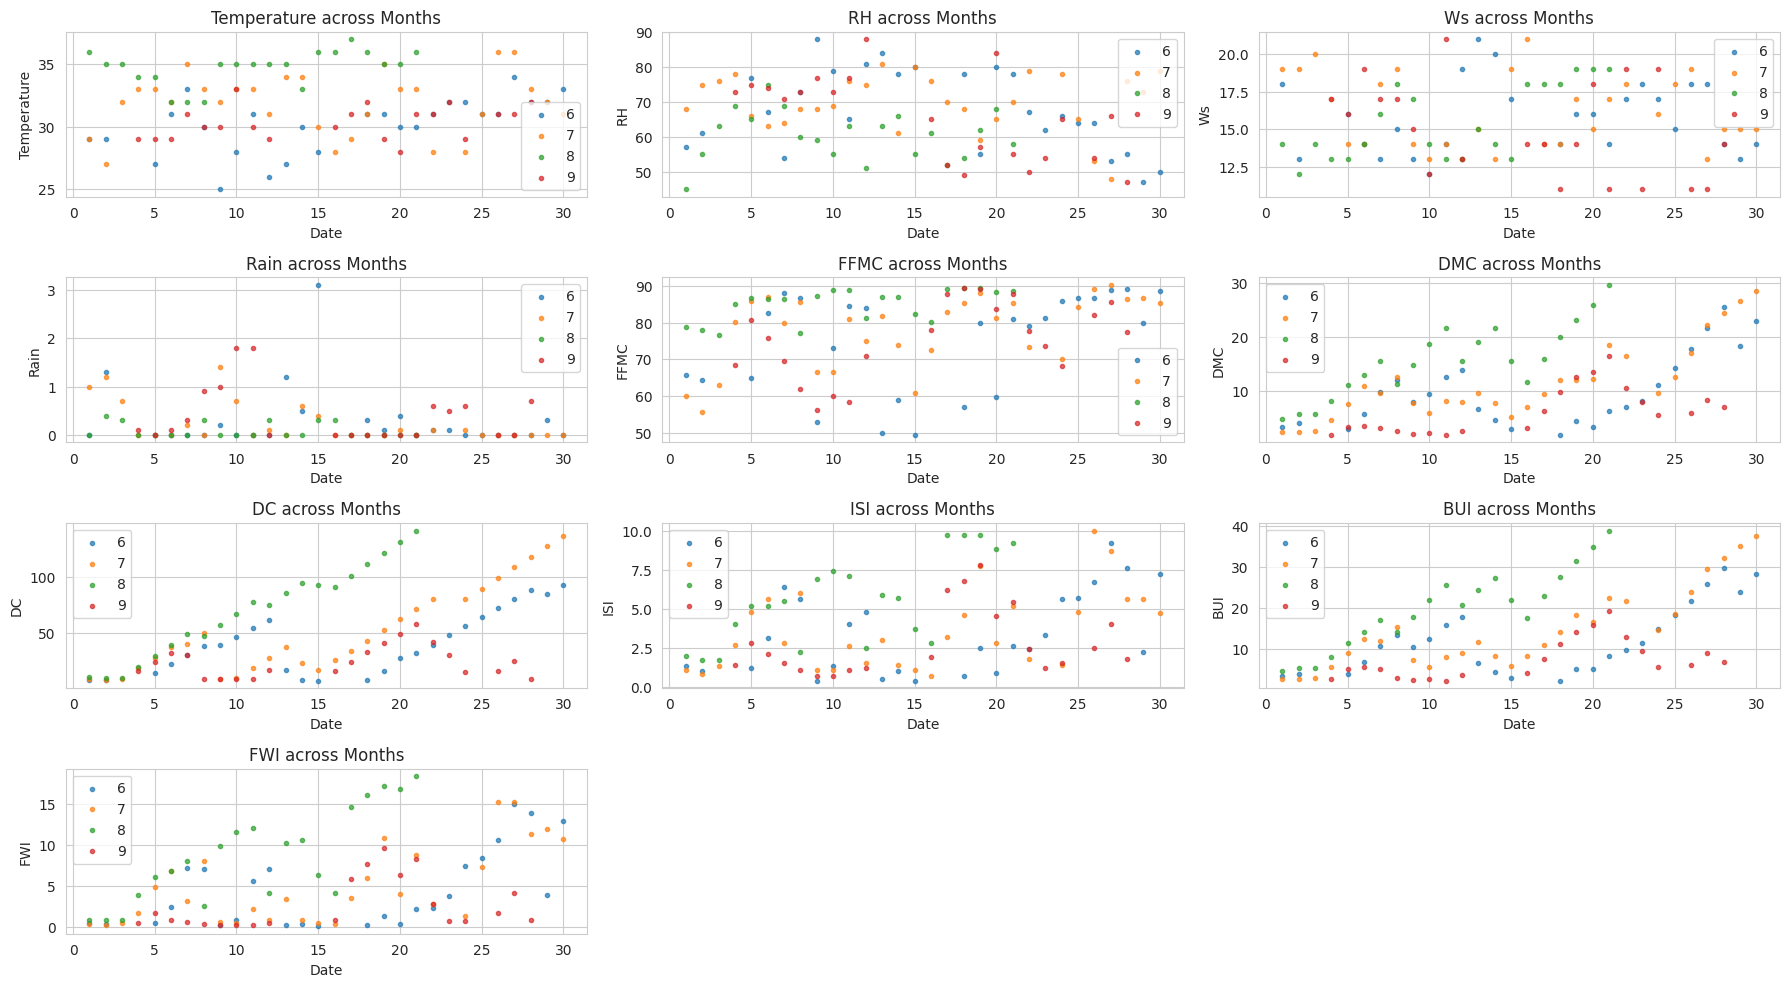

In [ ]:
plt.figure(figsize=(18, 12))
for i, variable in enumerate(dfplotB, start=1):
    plt.subplot(5, 3, i)
    for month, df_plot in df1.groupby('month'):
        plt.scatter(df_plot['day'], df_plot[variable], label=month, alpha=0.7, marker='.')
    plt.title(f'{variable} across Months')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.legend()
plt.tight_layout()
plt.show()

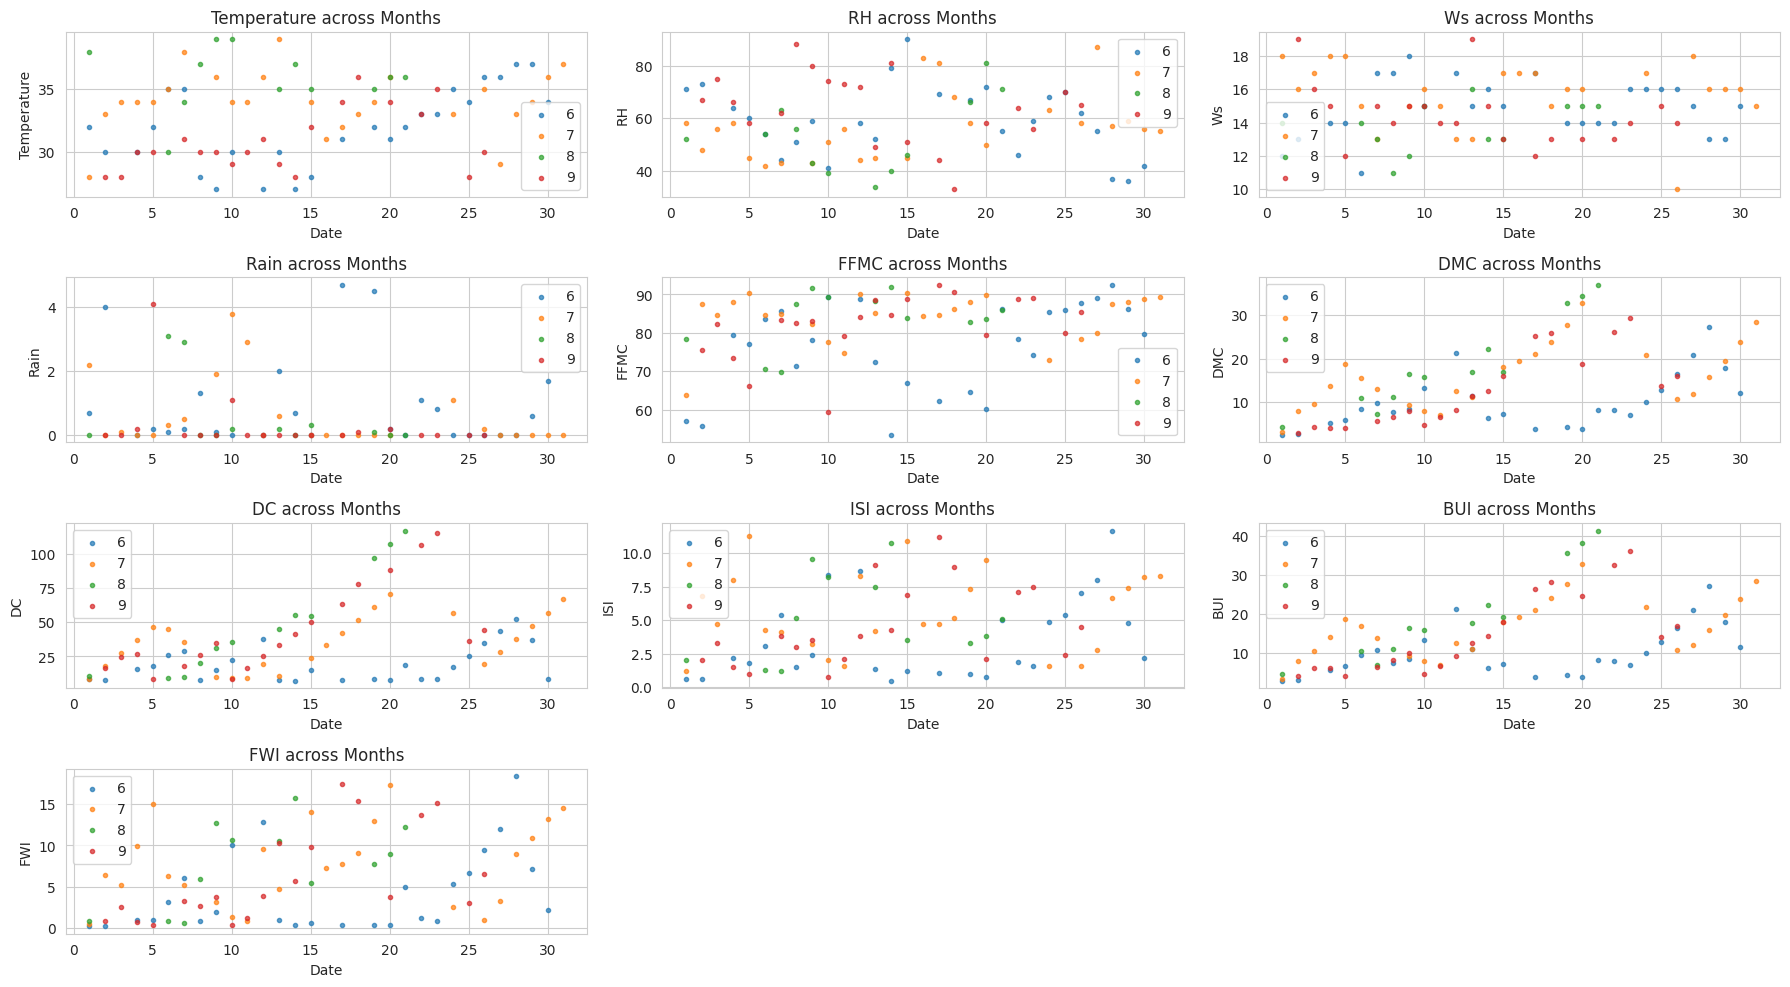

In [ ]:
plt.figure(figsize=(18, 12))
for i, variable in enumerate(dfplotS, start=1):
    plt.subplot(5, 3, i)
    for month, df_plot in df2.groupby('month'):
        plt.scatter(df_plot['day'], df_plot[variable], label=month, alpha=0.7, marker='.')
    plt.title(f'{variable} across Months')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.legend()
plt.tight_layout()
plt.show()

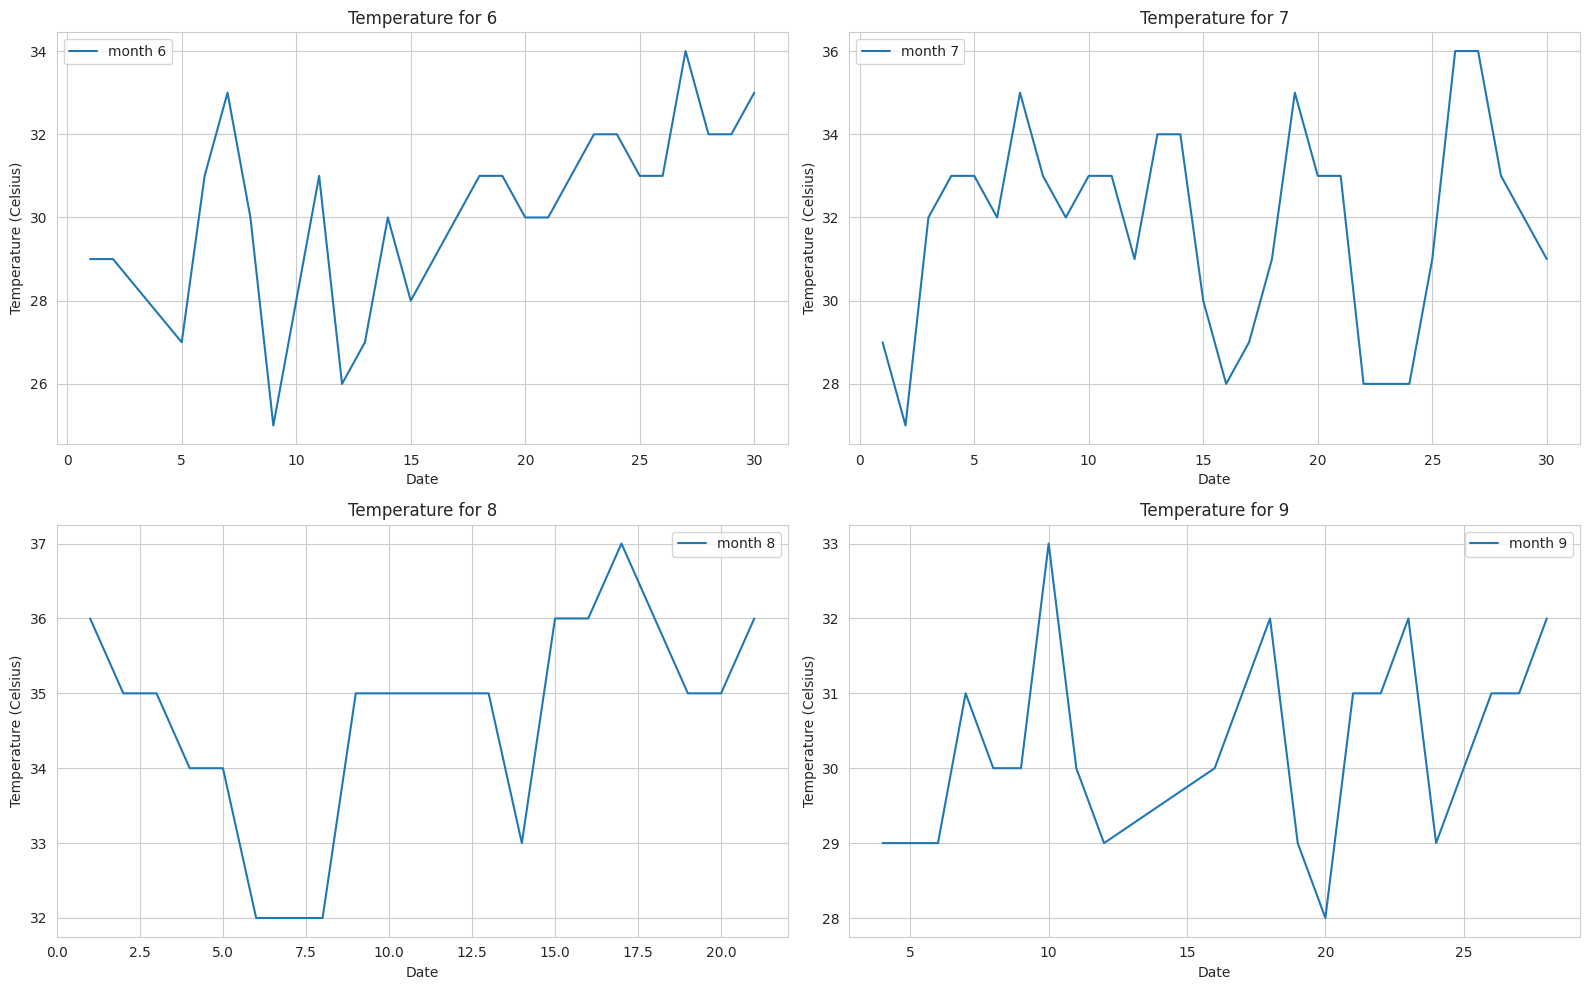

In [ ]:
plt.figure(figsize=(16, 10))
for i, (month, df_plot) in enumerate(df.groupby('month')):
    plt.subplot(2, 2, i + 1)
    plt.plot(df1[df1['month'] == month]['day'], df1[df1['month'] == month]['Temperature'], label = f"month {month}")
    plt.xlabel('Date')
    plt.ylabel('Temperature (Celsius)')
    plt.title(f'Temperature for {month}')
    plt.legend()
plt.tight_layout()
plt.show()

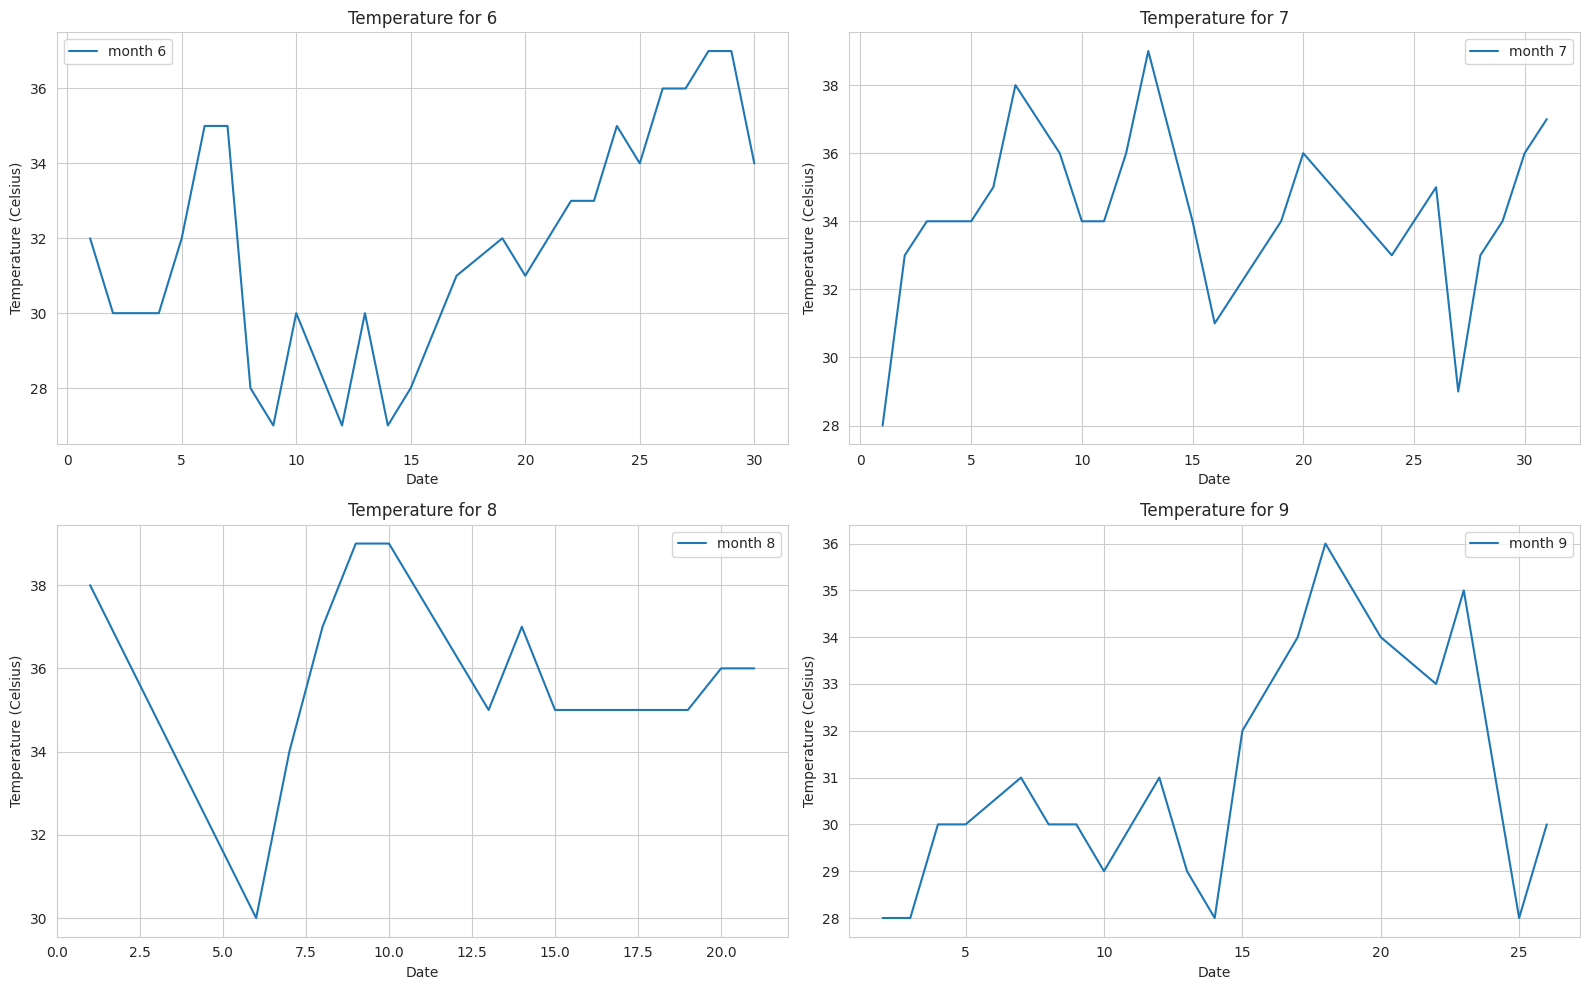

In [ ]:
plt.figure(figsize=(16, 10))
for i, (month, df_plot) in enumerate(df.groupby('month')):
    plt.subplot(2, 2, i + 1)
    plt.plot(df2[df2['month'] == month]['day'], df2[df2['month'] == month]['Temperature'], label = f"month {month}")
    plt.xlabel('Date')
    plt.ylabel('Temperature (Celsius)')
    plt.title(f'Temperature for {month}')
    plt.legend()
plt.tight_layout()
plt.show()

# Now becuase time in one session we can remove it

# Then we  can use pca from sklearn

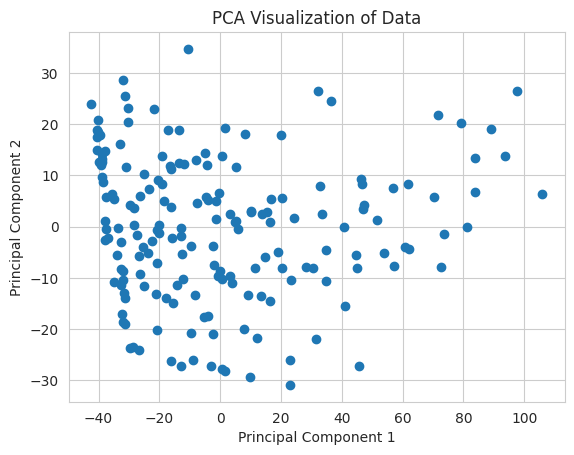

In [ ]:
dfp = df.drop(["day", "month"], axis = 1)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(dfp)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()